In [35]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import os
from glob import glob
import pandas as pd
from PIL import Image

In [5]:
ROOT_FOLDER = os.getcwd()

In [6]:
ROOT_FOLDER

'/Users/abhishekbose/code/pytorch_series'

In [12]:
DOGS_DATASET_PATH = os.path.join(ROOT_FOLDER,"data","Stanford_dogs","Images")

In [13]:
DOGS_IMAGES_FOLDERS = os.listdir(DOGS_DATASET_PATH)

In [14]:
DOGS_IMAGES_FOLDERS[0]

'n02097658-silky_terrier'

In [15]:
DOGS_DATASET_PATH

'/Users/abhishekbose/code/pytorch_series/data/Stanford_dogs/Images'

In [18]:
all_images = glob(os.path.join(DOGS_DATASET_PATH,"*","*.jpg"))

In [19]:
all_images[0]

'/Users/abhishekbose/code/pytorch_series/data/Stanford_dogs/Images/n02097658-silky_terrier/n02097658_26.jpg'

In [17]:
image_details = {
    "image_file":[],
    "label":[]
}


In [20]:
for image in all_images:
    image_file_path = image
    image_label = image_file_path.split("/")[-2]
    image_label = image_label.split("-")[-1]
    image_details["image_file"].append(image_file_path)
    image_details["label"].append(image_label)

{'image_file': ['/Users/abhishekbose/code/pytorch_series/data/Stanford_dogs/Images/n02097658-silky_terrier/n02097658_26.jpg',
  '/Users/abhishekbose/code/pytorch_series/data/Stanford_dogs/Images/n02097658-silky_terrier/n02097658_4869.jpg',
  '/Users/abhishekbose/code/pytorch_series/data/Stanford_dogs/Images/n02097658-silky_terrier/n02097658_595.jpg',
  '/Users/abhishekbose/code/pytorch_series/data/Stanford_dogs/Images/n02097658-silky_terrier/n02097658_9222.jpg',
  '/Users/abhishekbose/code/pytorch_series/data/Stanford_dogs/Images/n02097658-silky_terrier/n02097658_422.jpg',
  '/Users/abhishekbose/code/pytorch_series/data/Stanford_dogs/Images/n02097658-silky_terrier/n02097658_1326.jpg',
  '/Users/abhishekbose/code/pytorch_series/data/Stanford_dogs/Images/n02097658-silky_terrier/n02097658_7970.jpg',
  '/Users/abhishekbose/code/pytorch_series/data/Stanford_dogs/Images/n02097658-silky_terrier/n02097658_10567.jpg',
  '/Users/abhishekbose/code/pytorch_series/data/Stanford_dogs/Images/n0209765

In [25]:
data = pd.DataFrame(data=image_details)

In [26]:
data.head()

,image_file,label
0,/Users/abhishekbose/code/pytorch_series/data/S...,silky_terrier
1,/Users/abhishekbose/code/pytorch_series/data/S...,silky_terrier
2,/Users/abhishekbose/code/pytorch_series/data/S...,silky_terrier
3,/Users/abhishekbose/code/pytorch_series/data/S...,silky_terrier
4,/Users/abhishekbose/code/pytorch_series/data/S...,silky_terrier


In [27]:
data.describe()

,image_file,label
count,20580,20580
unique,20580,119
top,/Users/abhishekbose/code/pytorch_series/data/S...,coated_retriever
freq,1,303


In [33]:
data["label"].value_counts().head()

coated_retriever      303
Maltese_dog           252
Afghan_hound          239
Scottish_deerhound    232
Pomeranian            219
Name: label, dtype: int64

In [120]:
from typing import Any, Tuple


class StanfordDogs(Dataset):
    def __init__(self,transform=None,target_transform = None) -> None:
        super().__init__()
        self.transform= transform
        self.target_transform = target_transform
        self.data_path = DOGS_DATASET_PATH
        self.all_images = glob(os.path.join(DOGS_DATASET_PATH,"*","*.jpg"))
        self.data_with_labels = {
            "image_file":[],
            "label":[]
        }

        self.df = None
        self.label_dict = {}

        if self.all_images:
            self.__prepare_data()
            self.__create_label_map()
        else:
            raise Exception("Cannot load stanford dataset. Couldn't find the images")

    def __prepare_data(self):
        for image_path in self.all_images:
            image_label = image_path.split("/")[-2]
            image_label = image_label.split("-")[-1]
            self.data_with_labels["image_file"].append(image_path)
            self.data_with_labels["label"].append(image_label)

        self.df = pd.DataFrame(data=self.data_with_labels)


    def __create_label_map(self):
        labels = self.df.label.unique().tolist()
        self.label_dict = {value:index for index,value in enumerate(labels)}
    
    def __getitem__(self,idx:int) -> Tuple[Any,Any]:
        row = self.df.loc[idx]
        image = Image.open(row["image_file"])
        label = row["label"]
        label = self.label_dict[label]

        if self.transform:
            image = self.transform(image)
            image = image.permute((1,2,0))

        if self.target_transform:
            label = self.target_transform(label)

        return image,label     

    
    def __repr__(self):
        return f"Stanford dogs dataset with {len(self.all_images)} images"


    def __len__(self):
        return len(self.all_images)

    

In [121]:
stanford_dogs = StanfordDogs(transform=ToTensor())

In [122]:
stanford_dogs

Stanford dogs dataset with 20580 images

In [123]:
image,label = stanford_dogs[0]

In [124]:
stanford_dogs.label_dict

{'silky_terrier': 0,
 'Scottish_deerhound': 1,
 'Chesapeake_Bay_retriever': 2,
 'Ibizan_hound': 3,
 'haired_fox_terrier': 4,
 'Saluki': 5,
 'cocker_spaniel': 6,
 'schipperke': 7,
 'borzoi': 8,
 'Pembroke': 9,
 'komondor': 10,
 'Staffordshire_bullterrier': 11,
 'standard_poodle': 12,
 'Eskimo_dog': 13,
 'English_foxhound': 14,
 'golden_retriever': 15,
 'Sealyham_terrier': 16,
 'Japanese_spaniel': 17,
 'miniature_schnauzer': 18,
 'malamute': 19,
 'malinois': 20,
 'Pekinese': 21,
 'giant_schnauzer': 22,
 'Mexican_hairless': 23,
 'Doberman': 24,
 'standard_schnauzer': 25,
 'dhole': 26,
 'German_shepherd': 27,
 'Bouvier_des_Flandres': 28,
 'Siberian_husky': 29,
 'Norwich_terrier': 30,
 'Irish_terrier': 31,
 'Norfolk_terrier': 32,
 'Saint_Bernard': 33,
 'Border_terrier': 34,
 'briard': 35,
 'Tibetan_mastiff': 36,
 'bull_mastiff': 37,
 'Maltese_dog': 38,
 'Kerry_blue_terrier': 39,
 'kuvasz': 40,
 'Greater_Swiss_Mountain_dog': 41,
 'Lakeland_terrier': 42,
 'Blenheim_spaniel': 43,
 'basset': 44

In [125]:
image.shape

torch.Size([400, 448, 3])

In [126]:
label

0

In [127]:
image.permute((1,2,0)).shape

torch.Size([448, 3, 400])

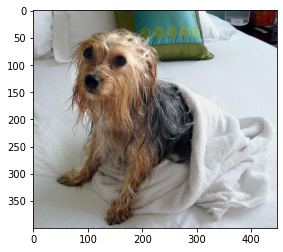

In [128]:
plt.imshow(image)
plt.show()

In [116]:
stanford_dogs.df.head()

,image_file,label
0,/Users/abhishekbose/code/pytorch_series/data/S...,silky_terrier
1,/Users/abhishekbose/code/pytorch_series/data/S...,silky_terrier
2,/Users/abhishekbose/code/pytorch_series/data/S...,silky_terrier
3,/Users/abhishekbose/code/pytorch_series/data/S...,silky_terrier
4,/Users/abhishekbose/code/pytorch_series/data/S...,silky_terrier


In [117]:
labels = stanford_dogs.df.label.unique().tolist()

In [118]:
label_dict = {value:index for index,value in enumerate(labels)}

In [119]:
label_dict

{'silky_terrier': 0,
 'Scottish_deerhound': 1,
 'Chesapeake_Bay_retriever': 2,
 'Ibizan_hound': 3,
 'haired_fox_terrier': 4,
 'Saluki': 5,
 'cocker_spaniel': 6,
 'schipperke': 7,
 'borzoi': 8,
 'Pembroke': 9,
 'komondor': 10,
 'Staffordshire_bullterrier': 11,
 'standard_poodle': 12,
 'Eskimo_dog': 13,
 'English_foxhound': 14,
 'golden_retriever': 15,
 'Sealyham_terrier': 16,
 'Japanese_spaniel': 17,
 'miniature_schnauzer': 18,
 'malamute': 19,
 'malinois': 20,
 'Pekinese': 21,
 'giant_schnauzer': 22,
 'Mexican_hairless': 23,
 'Doberman': 24,
 'standard_schnauzer': 25,
 'dhole': 26,
 'German_shepherd': 27,
 'Bouvier_des_Flandres': 28,
 'Siberian_husky': 29,
 'Norwich_terrier': 30,
 'Irish_terrier': 31,
 'Norfolk_terrier': 32,
 'Saint_Bernard': 33,
 'Border_terrier': 34,
 'briard': 35,
 'Tibetan_mastiff': 36,
 'bull_mastiff': 37,
 'Maltese_dog': 38,
 'Kerry_blue_terrier': 39,
 'kuvasz': 40,
 'Greater_Swiss_Mountain_dog': 41,
 'Lakeland_terrier': 42,
 'Blenheim_spaniel': 43,
 'basset': 44